In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [4]:
wood.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [5]:
wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [6]:
steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [17]:
wood[wood['Name'] == 'El Toro']

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
11,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1291,2014
21,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1464,2015
32,3,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1121,2016
55,25,El Toro,Freitzeitpark Plohn,"Legendfeld, Germany",Great Coasters Int.,2009,166,2016
80,1,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2009,1241,2017
120,41,El Toro,Freitzeitpark Plohn,"Legendfeld, Germany",Great Coasters Int.,2006,92,2017
131,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1197,2018


In [28]:
# create a function that takes in three arguments (roller coaster name, the dataframe it belongs to, and its park)
# it should return a line graph of the ranking change over time.
def ranking_change(rc_name, df, park_name):
    x_values = df['Year of Rank'][(df['Name'] == rc_name) & (df['Park'] == park_name)]
    y_values = df['Rank'][(df['Name'] == rc_name) & (df['Park'] == park_name)]
    
    plt.plot(x_values, y_values, marker='o')
    plt.title('Ranking Change Over Time')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.gca().invert_yaxis()
    plt.show()

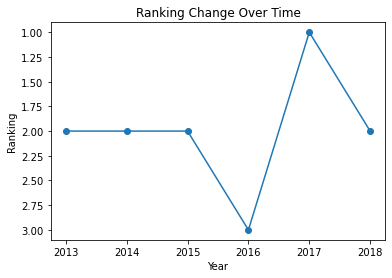

In [29]:
ranking_change('El Toro', wood, 'Six Flags Great Adventure')

In [31]:
wood[wood['Name'] == 'Boulder Dash']

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
10,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014
20,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015
30,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016
82,3,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1171,2017
133,4,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,982,2018


In [35]:
# create a function that plot two lines to compare rankings of two roller coasters over time 
# it should take in five arguments (two roller coaster names, two park names, and the dataframe they belong to)
def ranking_compare(rc_name1, rc_name2, df, park1, park2):
    x_value1 = df['Year of Rank'][(df['Name'] == rc_name1) & (df['Park'] == park1)]
    y_value1 = df['Rank'][(df['Name'] == rc_name1) & (df['Park'] == park1)]

    x_value2 = df['Year of Rank'][(df['Name'] == rc_name2) & (df['Park'] == park2)]
    y_value2 = df['Rank'][(df['Name'] == rc_name2) & (df['Park'] == park2)]
    
    plt.plot(x_value1, y_value1, marker='o', color='olive')
    plt.plot(x_value2, y_value2, marker='o', linestyle='--', color='olive')
    plt.title('Ranking Comparison Over Time')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.gca().invert_yaxis()
    plt.show()

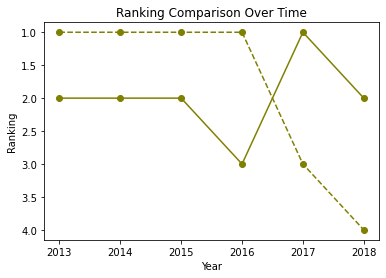

In [36]:
ranking_compare('El Toro', 'Boulder Dash', wood, 'Six Flags Great Adventure', 'Lake Compounce')

In [48]:
# create a function that plots the ranking of the top n ranked roller coasters over time as lines.
def top_n_rank(n, df):
    top_n_rankings = df[df['Rank'] <= n]
    plt.figure(figsize=(10, 8))
    ax = plt.subplot()
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster, marker='o')
        plt.legend(loc=1, fontsize=10)

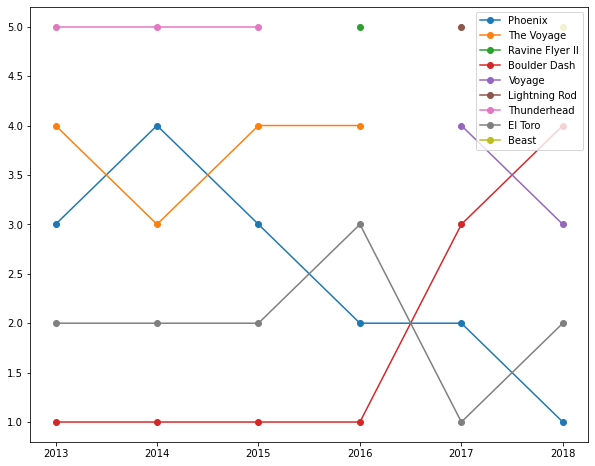

In [49]:
top_n_rank(5, wood)

In [142]:
# load data from roller_coasters.csv
rc_data = pd.read_csv('roller_coasters.csv')

In [143]:
rc_data.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [144]:
rc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


In [145]:
rc_data.columns

Index(['name', 'material_type', 'seating_type', 'speed', 'height', 'length',
       'num_inversions', 'manufacturer', 'park', 'status'],
      dtype='object')

In [146]:
rc_data['height'][rc_data['height'] <= 140].values

array([37., 25.,  8., ..., 17., 30., 11.])

In [147]:
# create a function that plot a histogram of any numeric column of the rc_data dataset
# it should take in two arguments (column name and dataframe name)
def numeric_hist(column, df):
    df[column] = df[column].dropna()
    if column == 'height':
        heights = df[column][df[column] <= 140].values
        plt.hist(heights, bins=20)
    else:
        plt.hist(df[column], bins=20)
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

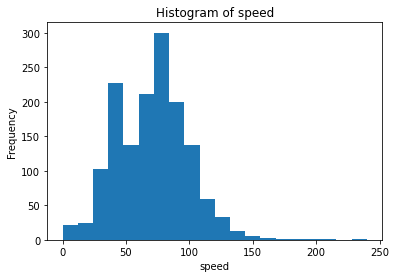

In [148]:
numeric_hist('speed', rc_data)

In [149]:
# create a function that plot a bar chart that shows the number of inversions for each roller coaster at a specific amusement park
# it should take in two arguments (dataframe and name of the park)
def inversion_in_park(df, park_name):
    new_df = df[df['park'] == park_name]
    inversions = new_df['num_inversions']
    roller_coasters = new_df['name']
    y_pos = range(len(roller_coasters))
    
    ax = plt.subplot()
    # create horizontal bar graph with .barh
    plt.barh(y_pos, inversions)
    plt.yticks(y_pos, roller_coasters)
    
    # set vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='--', color='#eeeeee', alpha=0.4, zorder=1)
    
    plt.title('Inversions of Each Roller Coasters in' + park_name)
    plt.xlabel('Number of Inversions')
    plt.ylabel('Roller Coaster Name')
    plt.show()

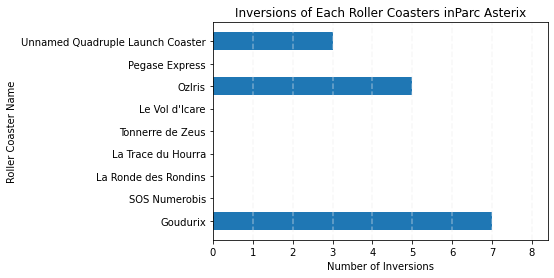

In [150]:
inversion_in_park(rc_data, 'Parc Asterix')

In [170]:
# create a function that plots a pie chart that compares the number of open and closed roller coasters
# it should take in one argument (dataframe)
def open_closed_rc(df):
    operating = df[df['status'] == 'status.operating']
    closed = df[df['status'] == 'status.closed.definitely']
    
    open_closed = [len(operating), len(closed)]
    
    plt.pie(open_closed, labels=['operating', 'closed'], autopct='%d%%')
    plt.axis('equal')
    plt.show()

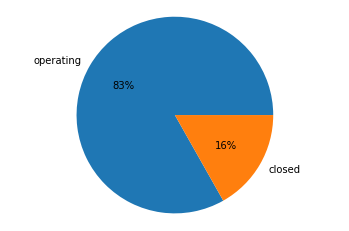

In [171]:
open_closed_rc(rc_data)

In [178]:
# create a function that creates a scatter plot of two numeric columns of the dataframe
# it should take in three arguments (dataframe, column1, column2)
def create_scatter(df, column1, column2):
    if column1 == 'height' or column2 == 'height':
        df = df[df['height'] <= 140]
        plt.scatter(x=df[column1], y=df[column2])
    else:
        plt.scatter(x=df[column1], y=df[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title('Association between '+ column1 + ' and ' + column2)
    plt.show()

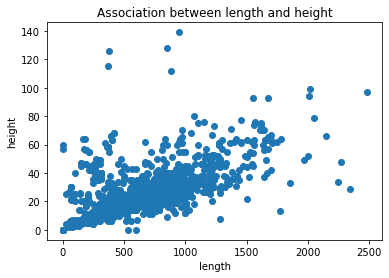

In [179]:
create_scatter(rc_data, 'length', 'height')

In [180]:
# different seat types
rc_data['seating_type'].unique()

array(['Sit Down', 'Suspended', 'Inverted', 'Spinning', 'Water Coaster',
       'Floorless', 'Bobsleigh', 'Stand Up', 'Flying', '4th Dimension',
       'Pipeline', 'Motorbike', 'Wing', 'Alpine', 'na'], dtype=object)

In [188]:
# which seating type has the most number of roller coasters?
seat_status = rc_data.groupby('status').get_group('status.operating')
seat_status.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [187]:
seat_status['seating_type'].value_counts(normalize=True)

Sit Down         0.773481
Spinning         0.060773
Inverted         0.046961
Alpine           0.019797
Suspended        0.017956
na               0.014733
Floorless        0.011971
Water Coaster    0.011510
Flying           0.009669
Motorbike        0.009208
4th Dimension    0.007366
Wing             0.006446
Stand Up         0.004144
Bobsleigh        0.004144
Pipeline         0.001842
Name: seating_type, dtype: float64

Among all operating roller coasters, 77.3% are sit-down type.

In [214]:
# association between the seating types of roller coasters (specificly sit-down and spinning) and the heights (histogram)
def seattype_height(df, seat_type1, seat_type2):
    height1 = [x for x in df['height'][df['seating_type'] == seat_type1] if x <= 140]
    height2 = [x for x in df['height'][df['seating_type'] == seat_type2] if x <= 140]
    
    ax = plt.subplot()
    plt.hist(height1, color='blue', alpha=0.5, label=seat_type1, density=True, stacked=True)
    plt.hist(height2, color='orange', alpha=0.5, label=seat_type2, density=True, stacked=True)
    plt.title('Seating Types and Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency Distribution')
    plt.show()

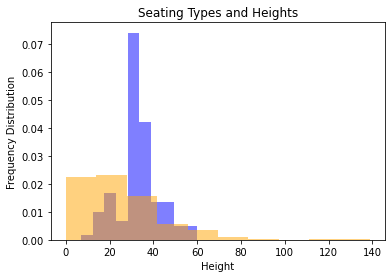

In [215]:
seattype_height(rc_data, 'Inverted', 'Sit Down')

Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)?

In [256]:
# Heights: create a function that sort from high to low on average heights for each manufacture and make a bar graph with top 10 manufacturers
def mean_by_manufacturer():
    mean_by_manufacture = rc_data.groupby('manufacturer').agg({'height':'mean', 'speed': 'mean', 'length': 'mean'}).reset_index()
    height_sorted = mean_by_manufacture.sort_values(by='height', ascending=False)[:10]
    speed_sorted = mean_by_manufacture.sort_values(by='speed', ascending=False)[:10]
    length_sorted = mean_by_manufacture.sort_values(by='length', ascending=False)[:10]
    
    # height by manufacturer
    manufacturers_heights = height_sorted['manufacturer'].values
    heights = height_sorted['height'].values
    
    # speed by manufacturer
    manufacturers_speeds = speed_sorted['manufacturer'].values
    speeds = speed_sorted['speed'].values
    
    # length by manufacturer
    manufacturers_length = length_sorted['manufacturer'].values
    lengths = length_sorted['length'].values
    
    plt.figure(figsize=(60, 20))
    ax1 = plt.subplot(1, 3, 1)
    plt.barh(range(len(manufacturers_heights)), heights)
    plt.yticks(range(len(manufacturers_heights)), manufacturers_heights, fontsize=20)
    plt.xticks(fontsize=20)
    plt.gca().invert_yaxis()
    
    vals1 = ax1.get_xticks()
    for tick in vals1:
        ax1.axvline(x=tick, linestyle='--', alpha=0.4, color='gray', zorder=1)
    
    plt.xlabel('Height', fontsize=20)
    plt.ylabel('Manufacturer', fontsize=20)
    plt.title('Top 10 Manufacturers with Largest Average Height', fontsize=20)
    
    ax2 = plt.subplot(1, 3, 2)
    plt.barh(range(len(manufacturers_speeds)), speeds, color='orange')
    plt.yticks(range(len(manufacturers_speeds)), manufacturers_speeds, fontsize=20)
    plt.xticks(fontsize=20)
    plt.gca().invert_yaxis()
    
    vals2 = ax2.get_xticks()
    for tick in vals2:
        ax2.axvline(x=tick, linestyle='--', alpha=0.4, color='gray', zorder=1)
    
    plt.xlabel('Speed', fontsize=20)
    plt.ylabel('Manufacturer', fontsize=20)
    plt.title('Top 10 Manufacturers with Highest Average Speed', fontsize=20)
    
    ax3 = plt.subplot(1, 3, 3)
    plt.barh(range(len(manufacturers_length)), lengths, color='green')
    plt.yticks(range(len(manufacturers_length)), manufacturers_length, fontsize=20)
    plt.xticks(fontsize=20)
    plt.gca().invert_yaxis()
    
    vals3 = ax3.get_xticks()
    for tick in vals3:
        ax3.axvline(x=tick, linestyle='--', alpha=0.4, color='gray', zorder=1)
        
    plt.xlabel('Length', fontsize=20)
    plt.ylabel('Manufacturer', fontsize=20)
    plt.title('Top 10 Manufacturers with Greatest Average Length', fontsize=20)
    
    plt.subplots_adjust(wspace=0.5)
    
    plt.show()

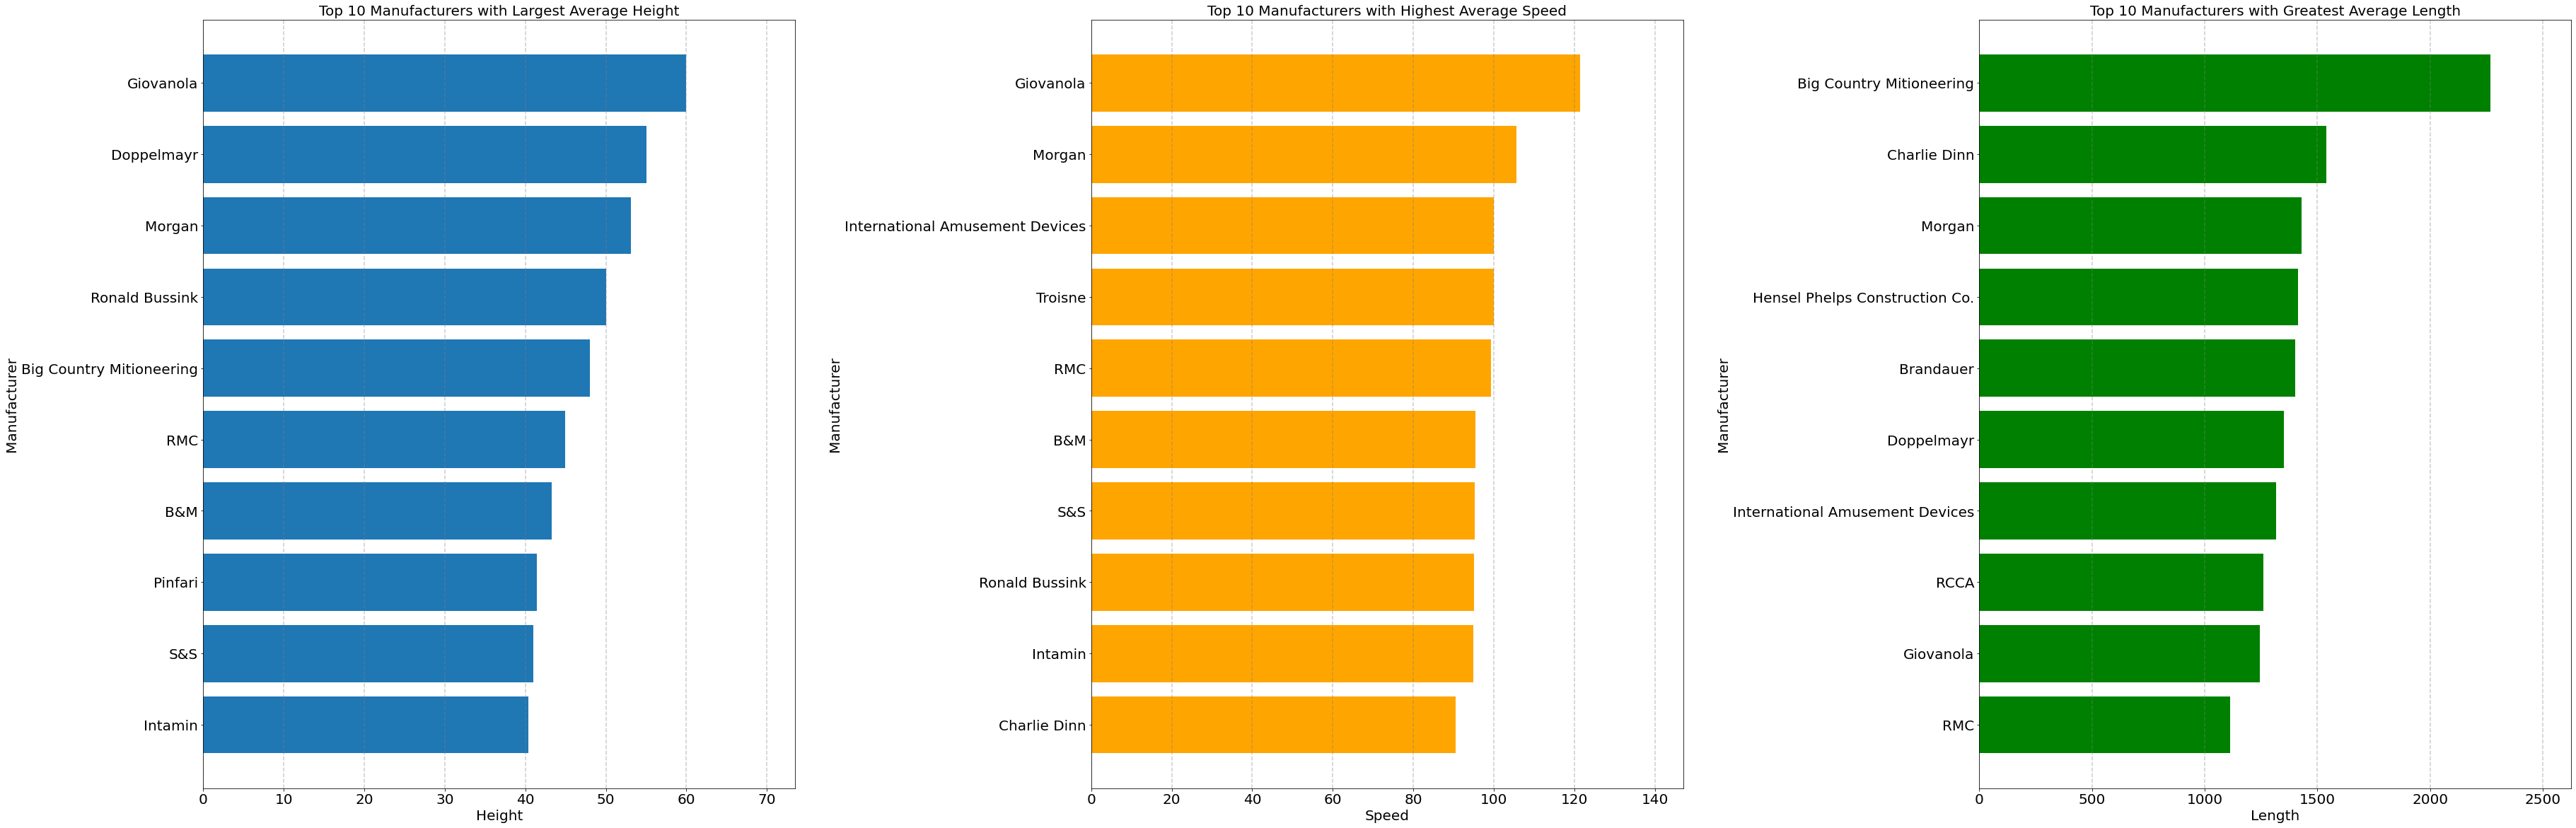

In [257]:
mean_by_manufacturer()

From the three bar graphs above, we can find that:
1. On average, Giovanola-manufactured roller coasters are both tallest in height and fastest in speed.
2. On average, Big Country Mitioneering's roller coasters are longest.